## Student Performance Indicator


#### Life cycle of Machine learning Project

1) Understanding the Problem Statement
2) Data Collection
3) Data Checks to perform
4) Exploratory data analysis
5) Data Pre-Processing
6) Model Training
7) Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [127]:
df = pd.read_csv("data/stud.csv")

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [128]:
df.shape

(1000, 8)

#### Dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3) Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing Values

In [129]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### Observation : There are no missing values in the dataset.

#### 3.2 Check Duplicates

In [130]:
df.duplicated().sum()

np.int64(0)

##### Observation : There are no duplicate values in the dataset.

#### 3.3 Check Data Types of each column

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values

In [132]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check Statistics of dataset

In [133]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 3.6 Check various categories present in the different categorical columns

In [134]:
print("Categories in [gender] column : ",end=" ")
print(df['gender'].unique())

print("Categories in [race_ethnicity] column : ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in [parental_level_of_education] column : ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in [lunch] column : ",end=" ")
print(df['lunch'].unique())

print("Categories in [test_preparation_course] column : ",end=" ")
print(df['test_preparation_course'].unique())

Categories in [gender] column :  ['female' 'male']
Categories in [race_ethnicity] column :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in [parental_level_of_education] column :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in [lunch] column :  ['standard' 'free/reduced']
Categories in [test_preparation_course] column :  ['none' 'completed']


In [135]:
categorical_features = []

for feature in df.columns:
    if df[feature].dtype == 'O':
        categorical_features.append(feature)

print(f"There are {len(categorical_features)} Categorical Features : {categorical_features}")      

There are 5 Categorical Features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [136]:
numerical_features = []

for feature in df.columns:
    if df[feature].dtype != 'O':
        numerical_features.append(feature)

print(f"There are {len(numerical_features)} Numerical Features : {numerical_features}") 

There are 3 Numerical Features : ['math_score', 'reading_score', 'writing_score']


#### 3.8 Adding columns for "Total Score" & "Average"

In [137]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average'] = df['total_score']/3

In [138]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [139]:
reading_full = df[df['reading_score'] == 100]['average'].count() ## How many people scored 100 in reading and also have a valid average score (non-null)...
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths : {math_full}')
print(f'Number of students with full marks in Writing : {writing_full}')
print(f'Number of students with full marks in Reading : {reading_full}')

Number of students with full marks in Maths : 7
Number of students with full marks in Writing : 14
Number of students with full marks in Reading : 17


In [140]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths : {math_less_20}')
print(f'Number of students with less than 20 marks in Writing : {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading : {reading_less_20}')

Number of students with less than 20 marks in Maths : 4
Number of students with less than 20 marks in Writing : 3
Number of students with less than 20 marks in Reading : 1


### 4) Exploratory Data Analysis (Visualisation)

#### 4.1 Distribution of Average Score

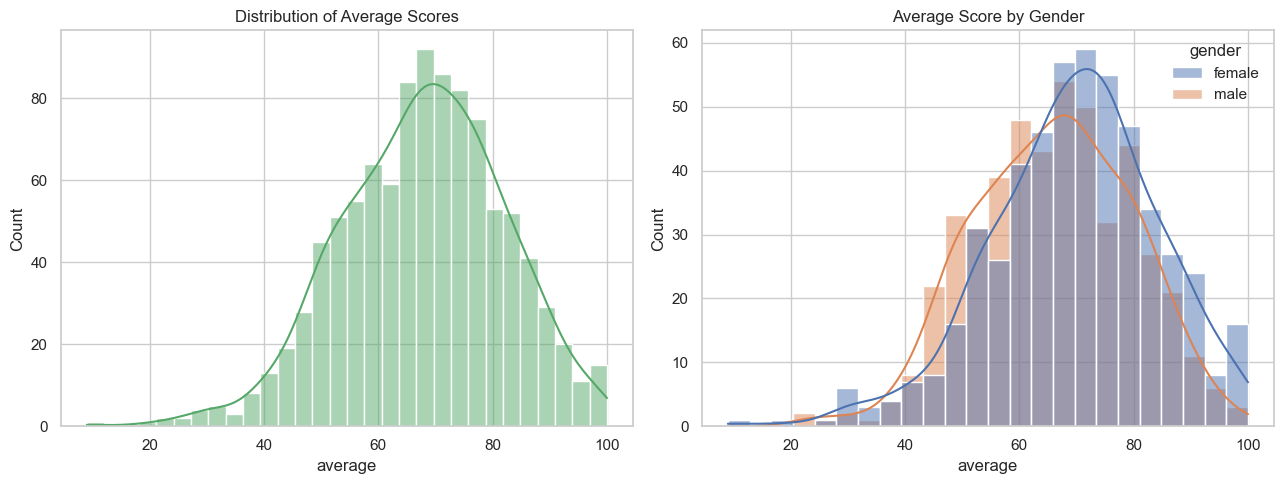

In [141]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Distribution of Average Scores")

sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Average Score by Gender")

plt.tight_layout()
plt.show()

#### 4.2 Distribution of Total Score

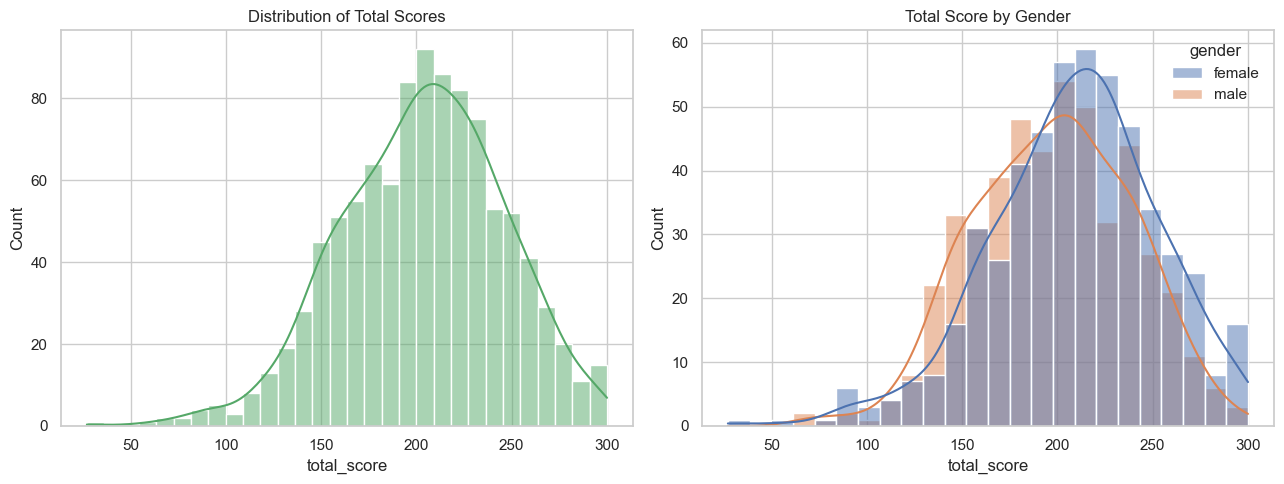

In [142]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Distribution of Total Scores")

sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Total Score by Gender")

plt.tight_layout()
plt.show()

##### Observation : Female students tends to perform better in exam than male students.

#### 4.3 Distribution of Average Score with respect to Lunch

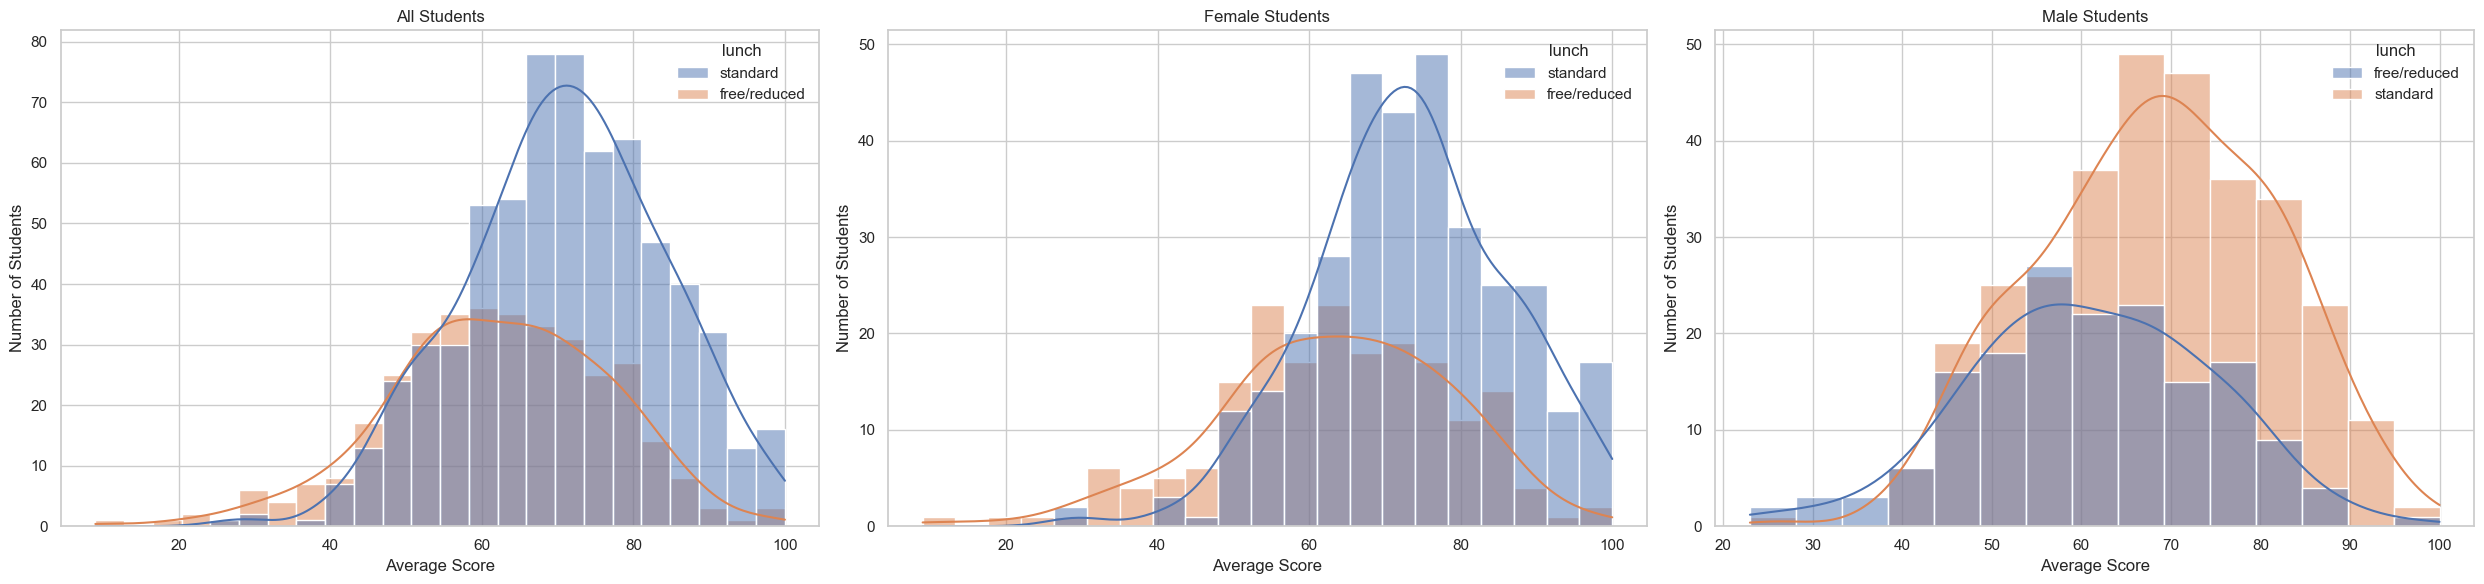

In [143]:
## here the plotting technique is different from the 2 above used....
plt.figure(figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('All Students')
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.title('Female Students')
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.title('Male Students')
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.tight_layout()
plt.show()

##### Observation : Standard Lunch helps perform better in exams for all students.

#### 4.4 Distribution of Average Score with respect to Parental Level of Education

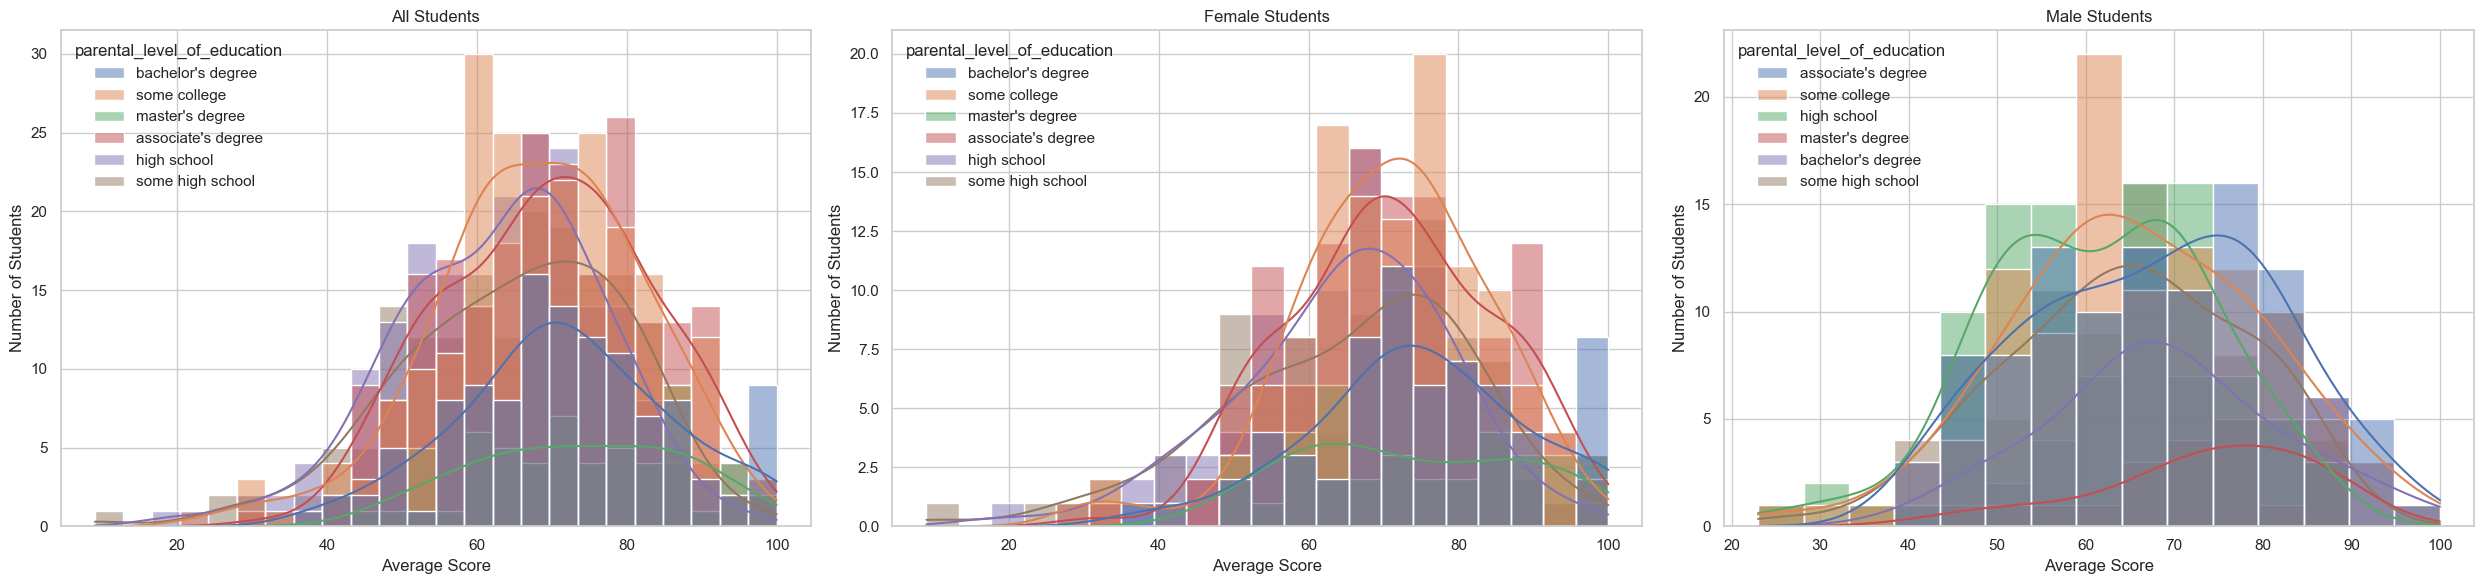

In [144]:
plt.figure(figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title('All Students')
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.title('Female Students')
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.title('Male Students')
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.tight_layout()
plt.show()

#### 4.5 Distribution of Average Score with respect to Race/Ethnicity

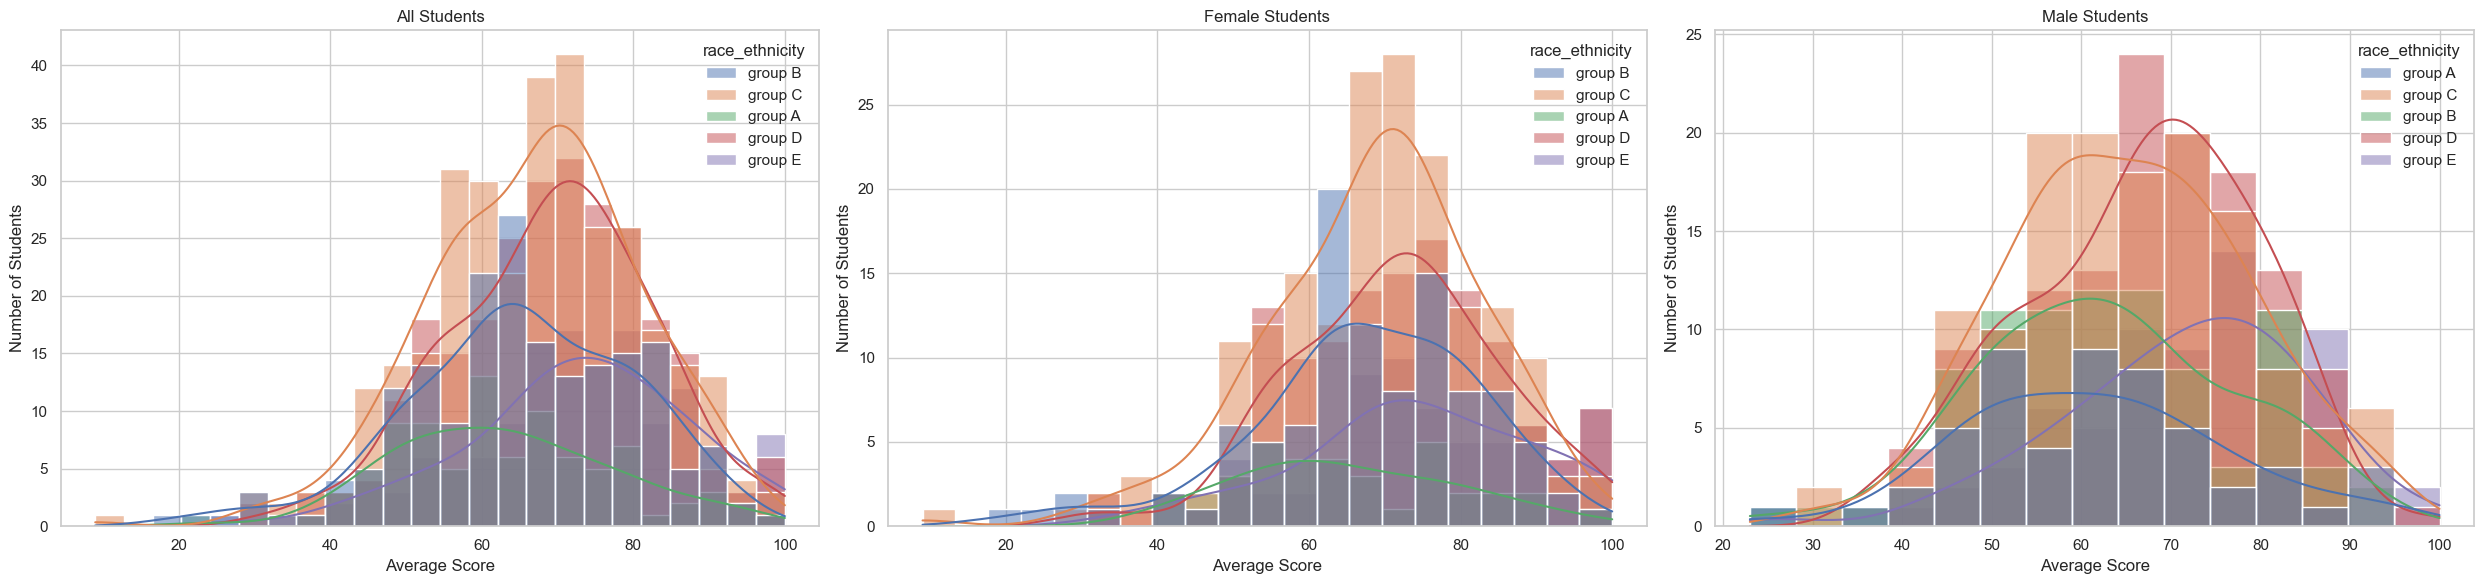

In [145]:
plt.figure(figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.title('All Students')
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity')
plt.title('Female Students')
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity')
plt.title('Male Students')
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

plt.tight_layout()
plt.show()

#### 4.6 Violin Plot of Math, Reading & Writing Scores

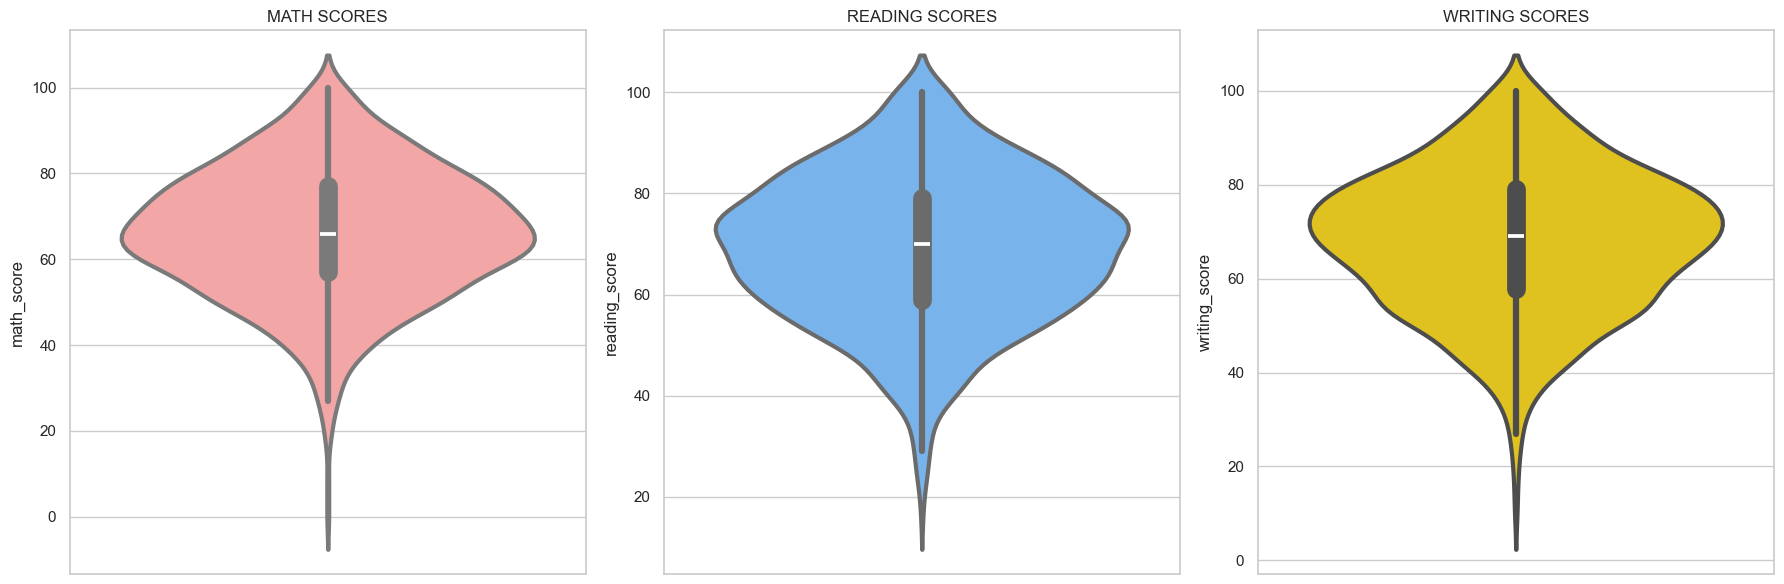

In [146]:
plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='#FF9999', linewidth=3)

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='#66B3FF', linewidth=3)

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='#FFD700', linewidth=3)

plt.tight_layout()
plt.show()


#### 4.7 Multivariate Analysis using Pieplot

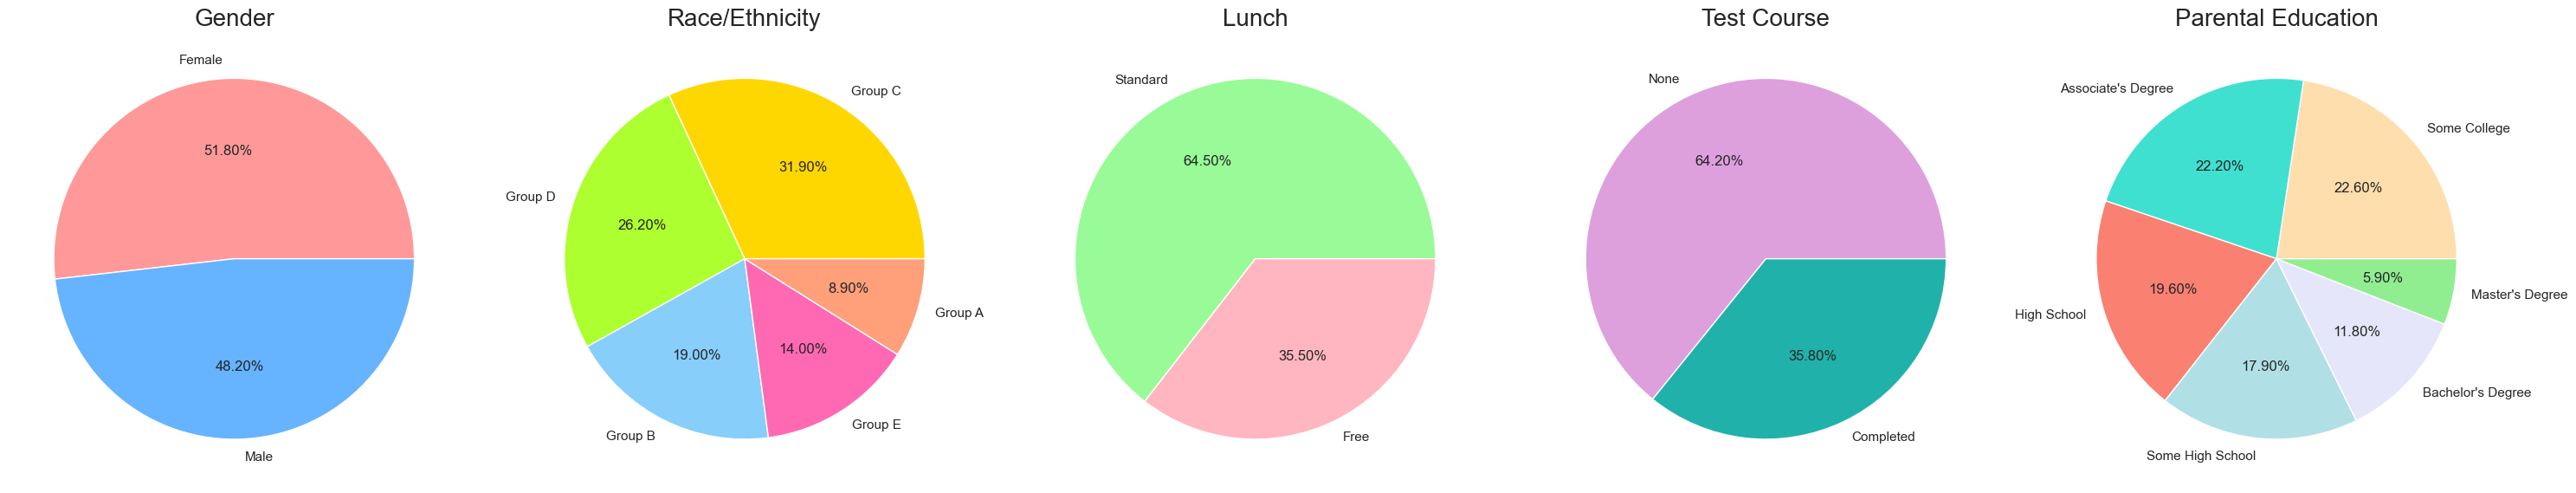

In [147]:
plt.rcParams['figure.figsize'] = (30, 12)

# Subplot 1: Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#FF9999', '#66B3FF']  # Light red, light blue

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Subplot 2: Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['#FFD700', '#ADFF2F', '#87CEFA', '#FF69B4', '#FFA07A']
# gold, greenyellow, skyblue, hotpink, lightsalmon

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Subplot 3: Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
colors = ['#98FB98', '#FFB6C1']  # palegreen, lightpink

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Subplot 4: Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
colors = ['#DDA0DD', '#20B2AA']  # plum, lightseagreen

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Subplot 5: Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['#FFDEAD', '#40E0D0', '#FA8072', '#B0E0E6', '#E6E6FA', '#90EE90']
# Navajowhite, turquoise, salmon, powderblue, lavender, lightgreen

plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.8 Feature Wise Visualizations

#### 4.8.1 Gender Column

##### Univariate Analysis : Distribution of Gender

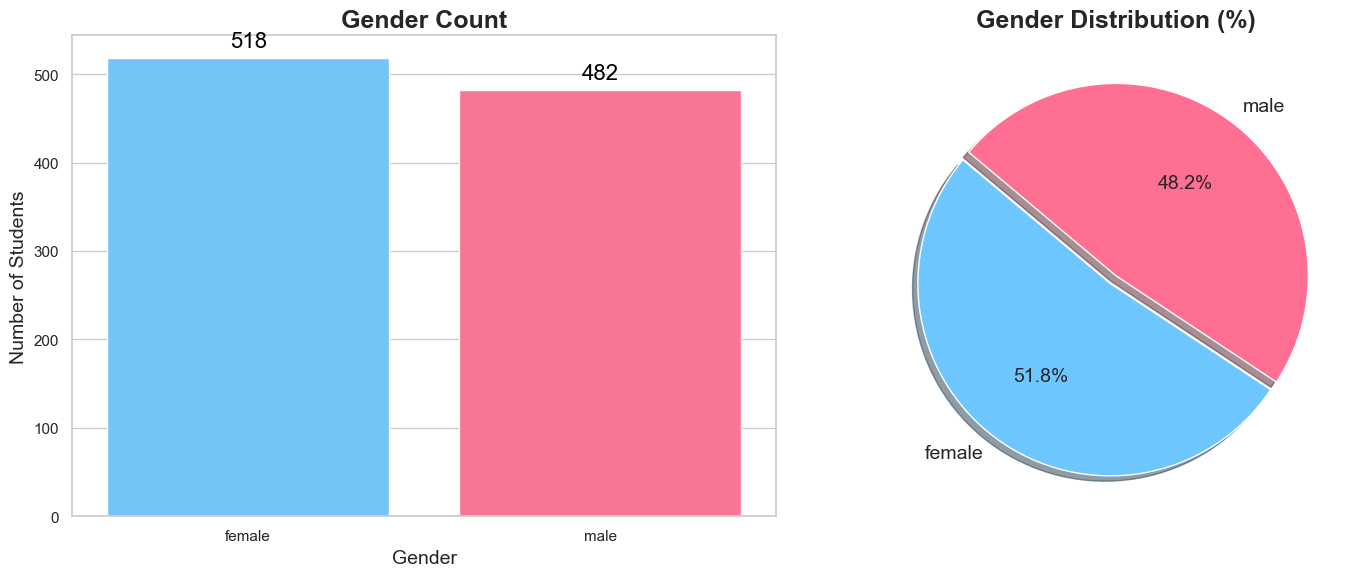

In [148]:
# Set visual style and figure size
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# -------------------- COUNT PLOT --------------------
sns.countplot(
    x='gender',
    data=df,
    palette=['#6EC6FF', '#FF6F91'],  # Custom appealing colors
    ax=ax[0],
    saturation=0.9
)
ax[0].set_title("Gender Count", fontsize=18, fontweight='bold')
ax[0].set_xlabel("Gender", fontsize=14)
ax[0].set_ylabel("Number of Students", fontsize=14)

# Add count labels on bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=16, label_type='edge', padding=5)

# -------------------- PIE CHART --------------------
gender_counts = df['gender'].value_counts()
labels = gender_counts.index
colors = ['#6EC6FF', '#FF6F91']  # Same as countplot
explode = [0.05 if label == 'female' else 0 for label in labels]

ax[1].pie(
    gender_counts,
    labels=labels,
    explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    colors=colors,
    textprops={'fontsize': 14}
)
ax[1].set_title("Gender Distribution (%)", fontsize=18, fontweight='bold')

# Display the plots
plt.tight_layout()
plt.show()


##### Bivariate Analysis : How gender affects Average Score & Maths Score

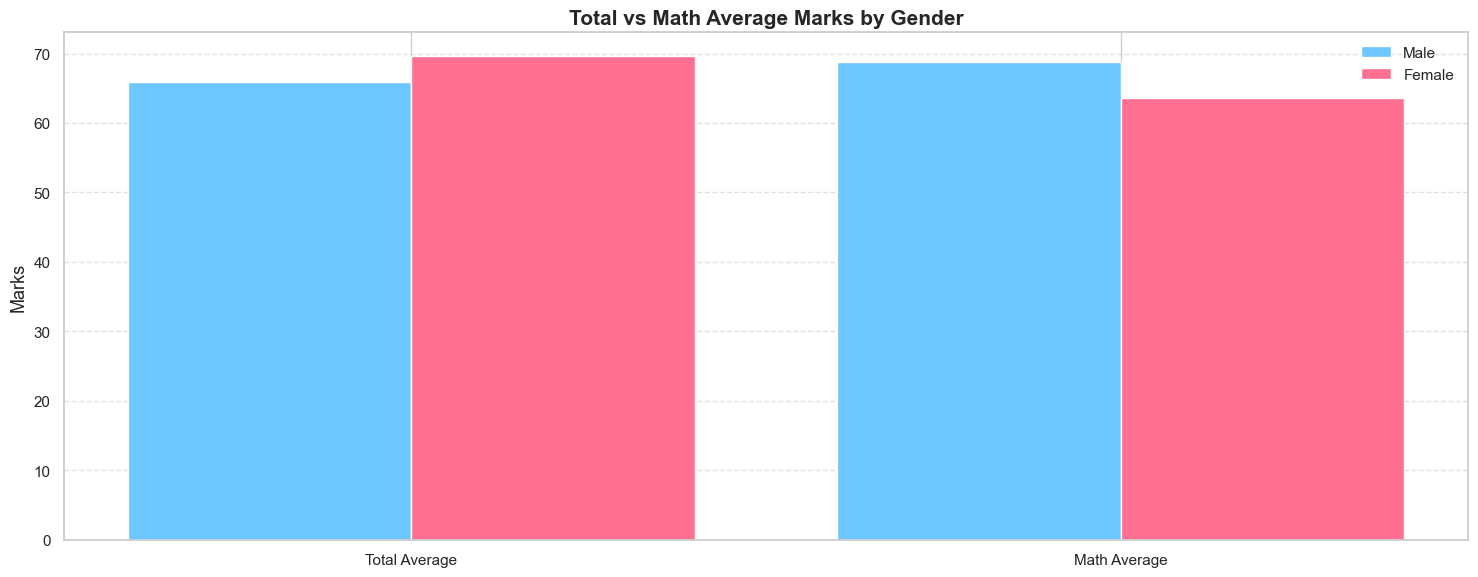

In [149]:
# Select only numeric columns before grouping
numeric_cols = ['math_score', 'reading_score', 'writing_score', 'average']
gender_group = df.groupby('gender')[numeric_cols].mean()

# Data for plot
X = ['Total Average', 'Math Average']
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='#6EC6FF')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='#FF6F91')

plt.xticks(X_axis, X)
plt.ylabel("Marks", fontsize=13)
plt.title("Total vs Math Average Marks by Gender", fontweight='bold', fontsize=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()